In [1]:
!pip install -Uqq fastbook

In [2]:
!pip install timm

In [3]:
from fastbook import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = untar_data(URLs.PETS)

In [6]:
data

Path('/root/.fastai/data/oxford-iiit-pet')

In [16]:
list(data.glob('*'))

[Path('/root/.fastai/data/oxford-iiit-pet/images'),
 Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [10]:
with open('/root/.fastai/data/oxford-iiit-pet/annotations/README', 'r') as f:
    print(f.read())

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class. 
The images have a large variations in scale, pose and lighting. All images have an 
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try ra

In [15]:
# with open('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt', 'r') as f:
#     print(f.read())

In [28]:
dls = ImageDataLoaders.from_name_func(
    data,
    fnames = get_image_files(data/'images'),
    label_func = RegexLabeller(r'^([^/]+)_\d+'),
    seed = 42,
    item_tfms = Resize(224)
)

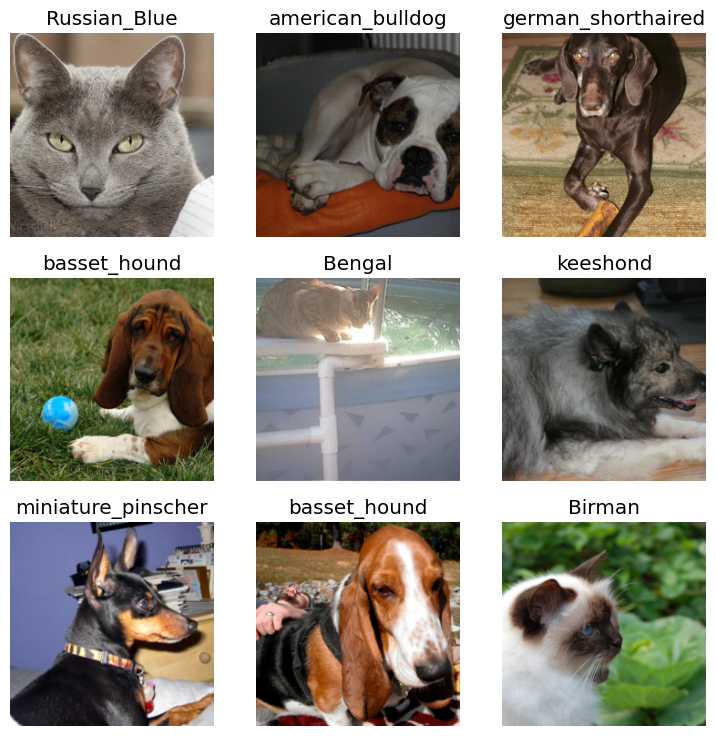

In [29]:
dls.show_batch()

In [30]:
import timm

In [31]:
learn = vision_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 208MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.483540,0.380552,0.880244,01:03


epoch,train_loss,valid_loss,accuracy,time
0,0.442569,0.343842,0.899188,00:59
1,0.270769,0.259151,0.920162,00:58
2,0.130447,0.213635,0.939784,00:56


In [42]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [44]:
learn2 = vision_learner(dls, 'convnext_tiny', metrics = accuracy)
learn2.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.901508,0.219865,0.930311,01:51


epoch,train_loss,valid_loss,accuracy,time
0,0.251484,0.204172,0.935724,03:12
1,0.178820,0.178967,0.947226,03:12
2,0.088285,0.157939,0.949932,03:13


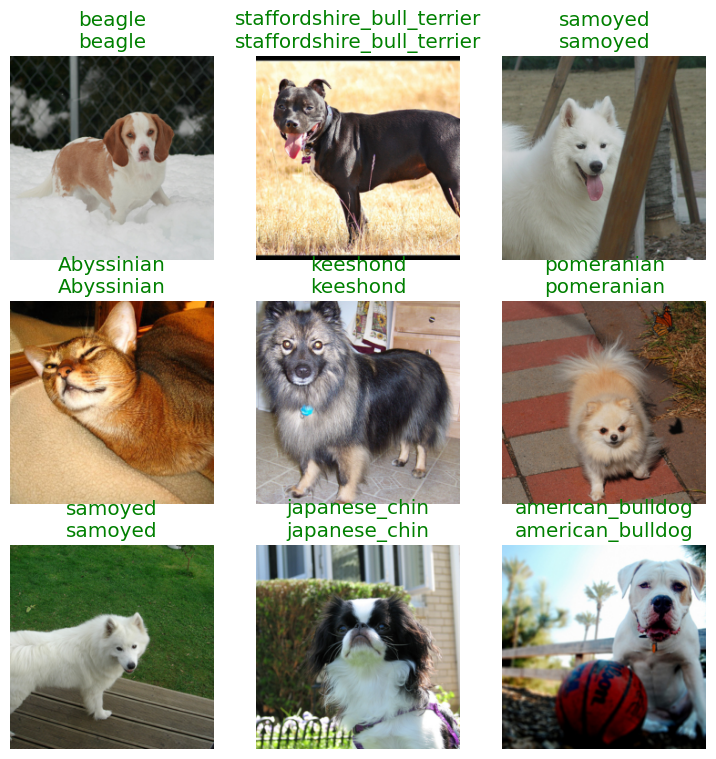

In [47]:
learn.show_results()

In [48]:
learn2.path

Path('/root/.fastai/data/oxford-iiit-pet')

In [49]:
learn2.dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [53]:
url = search_images_ddg('Basset hound picture', max_images = 1)[0]
url

'https://cdn.fotofits.com/responsive/1200x1200/petzlover/gallery/img/l/basset-hound-313441.jpg'

In [55]:
download_url(url, Path('test1.jpg'))

Path('test1.jpg')

In [59]:
learn2.predict('test1.jpg')

('basset_hound',
 tensor(14),
 tensor([6.9714e-09, 1.0508e-08, 2.9137e-08, 2.0175e-08, 1.6908e-08, 5.3294e-08, 6.3703e-08, 7.9737e-08, 4.4605e-09, 3.8439e-08, 2.5683e-08, 8.4180e-09, 2.0929e-08, 2.4256e-08, 9.9995e-01, 3.0493e-06,
         6.2180e-09, 3.7256e-09, 3.9104e-05, 1.5768e-07, 6.7914e-08, 4.7434e-08, 4.7849e-08, 3.8612e-09, 5.5572e-06, 3.6225e-07, 2.6551e-09, 6.7408e-07, 6.0224e-07, 1.8009e-08, 1.9371e-06, 2.7129e-08,
         1.6566e-07, 3.6075e-07, 7.4398e-08, 8.3788e-09, 3.2161e-09]))

In [60]:
learn2.export('model.pkl')

In [61]:
shutil.move(learn2.path/'model.pkl', './model.pkl')

'./model.pkl'

In [62]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 43.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=181e98c34b8f9e41be5846fa6a90384922db47f654d4bbf1b802e008b140dbd2
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.4.0
    Uninstalling mdit-py-plugins-0.4.0:
      Successfully uninstalled mdit-py-plugins-0.4.0


In [63]:
classes = learn2.dls.vocab
def predict(path):
    _, _, prob = learn2.predict(path)
    return dict(zip(classes, [float(i) for i in prob]))

In [64]:
predict('test1.jpg')

{'Abyssinian': 6.971401678157463e-09,
 'Bengal': 1.0507636538648057e-08,
 'Birman': 2.9136845824950797e-08,
 'Bombay': 2.017469036275088e-08,
 'British_Shorthair': 1.6907684141642676e-08,
 'Egyptian_Mau': 5.329443908408393e-08,
 'Maine_Coon': 6.370253657905778e-08,
 'Persian': 7.973736870781067e-08,
 'Ragdoll': 4.4604631099787184e-09,
 'Russian_Blue': 3.843929619051778e-08,
 'Siamese': 2.5683471349680076e-08,
 'Sphynx': 8.417973873520168e-09,
 'american_bulldog': 2.0928560218180792e-08,
 'american_pit_bull_terrier': 2.4255568220610257e-08,
 'basset_hound': 0.9999473094940186,
 'beagle': 3.0492694804706844e-06,
 'boxer': 6.217985237810808e-09,
 'chihuahua': 3.725648234365053e-09,
 'english_cocker_spaniel': 3.910382292815484e-05,
 'english_setter': 1.5768272021432495e-07,
 'german_shorthaired': 6.791363205138623e-08,
 'great_pyrenees': 4.743388259953463e-08,
 'havanese': 4.784933338441988e-08,
 'japanese_chin': 3.8612397723625236e-09,
 'keeshond': 5.557161784963682e-06,
 'leonberger': 3.

In [67]:
import gradio as gr

gr.Interface(
    inputs = gr.components.Image(shape = (512, 512)),
    outputs = gr.components.Label(num_top_classes = 5),
    fn = predict,
    examples = ['test1.jpg']
).launch(share = True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://573c6c35fe38743ff2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
